In [1]:
import os
import sys
import pandas as pd
import numpy as np
import anndata as ad
import scanpy as sc
import tacco as tc
import squidpy as sq

In [2]:
adata = sc.read_h5ad("/storage2/fs1/sanjayjain/Active/Xenium/Banksy_Atlas/20250602_Atlasresolvi_seven_samples_obj.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 1310855 × 300
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'sample', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'v2.subclass.levelKIL', 'sample_id', '_indices', '_scvi_batch', '_scvi_ind_x', '_scvi_labels', 'predicted_labels'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'neighbors', 'predicted_labels_colors', 'sample_colors', 'umap'
    obsm: 'X_resolVI', 'X_spatial', 'X_umap', 'distance_neighbor', 'index_neighbor', 'spatial'
    layers: 'counts', 'generated_expression'
    obsp: 'connectivities', 'distances'

/usr/local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


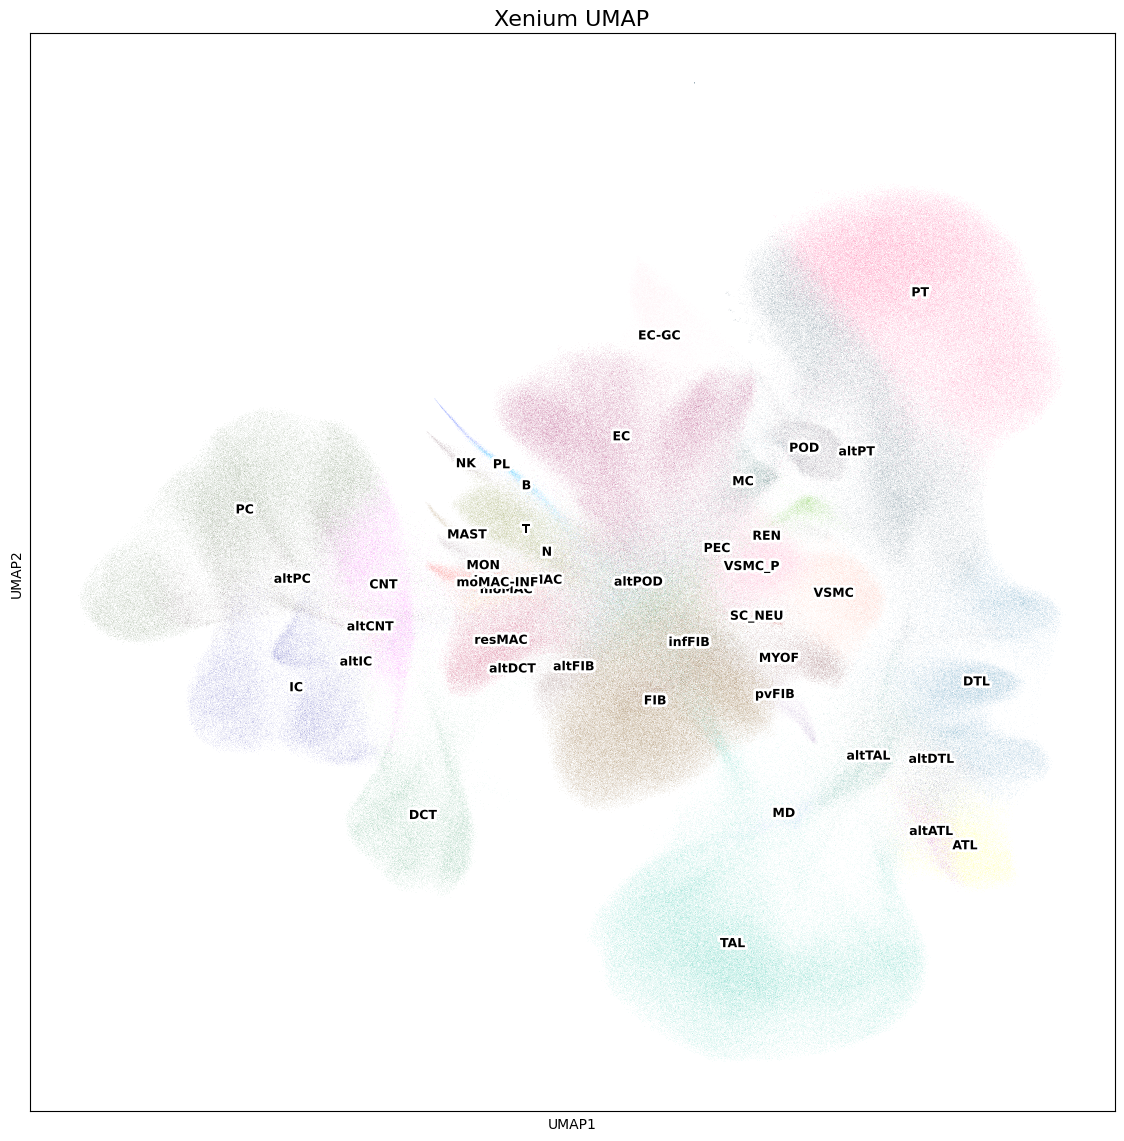

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,14))

sc.pl.umap(
    adata,
    color=['predicted_labels'],
    ax=ax,
    legend_loc="on data",
    legend_fontsize=9,
    legend_fontoutline=4,
    wspace=0.5,
    show=False  # let us modify before displaying
)

# Add title
ax.set_title("Xenium UMAP", fontsize=16)

# Save figure
fig.savefig("xenium_umap.png", dpi=300, bbox_inches='tight')

# Finally display
plt.show()

In [5]:
adata.obs['v2.subclass.levelKIL'].value_counts()

v2.subclass.levelKIL
TAL          187869
PT           158703
FIB          129330
EC           115024
altPT        108860
PC            72213
DTL           48919
IC            44493
DCT           36689
altPC         34604
resMAC        29038
CNT           28455
VSMC_P        26406
T             25775
VSMC          25448
altTAL        24313
altFIB        19219
MYOF          18579
EC-GC         16773
altDTL        16586
PEC           14576
POD           13681
infFIB        13054
ATL           12007
DC             8425
altPOD         8330
pvFIB          7923
MD             7227
MC             7210
altATL         6657
MON            6235
altIC          6106
B              4989
PL             4734
altCNT         4232
altDCT         3967
moMAC          3385
NK             2602
REN            2595
MAST           2128
SC_NEU         1168
moMAC-INF      1102
N               638
MAC             588
Name: count, dtype: int64

/usr/local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/usr/local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/usr/local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:401: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

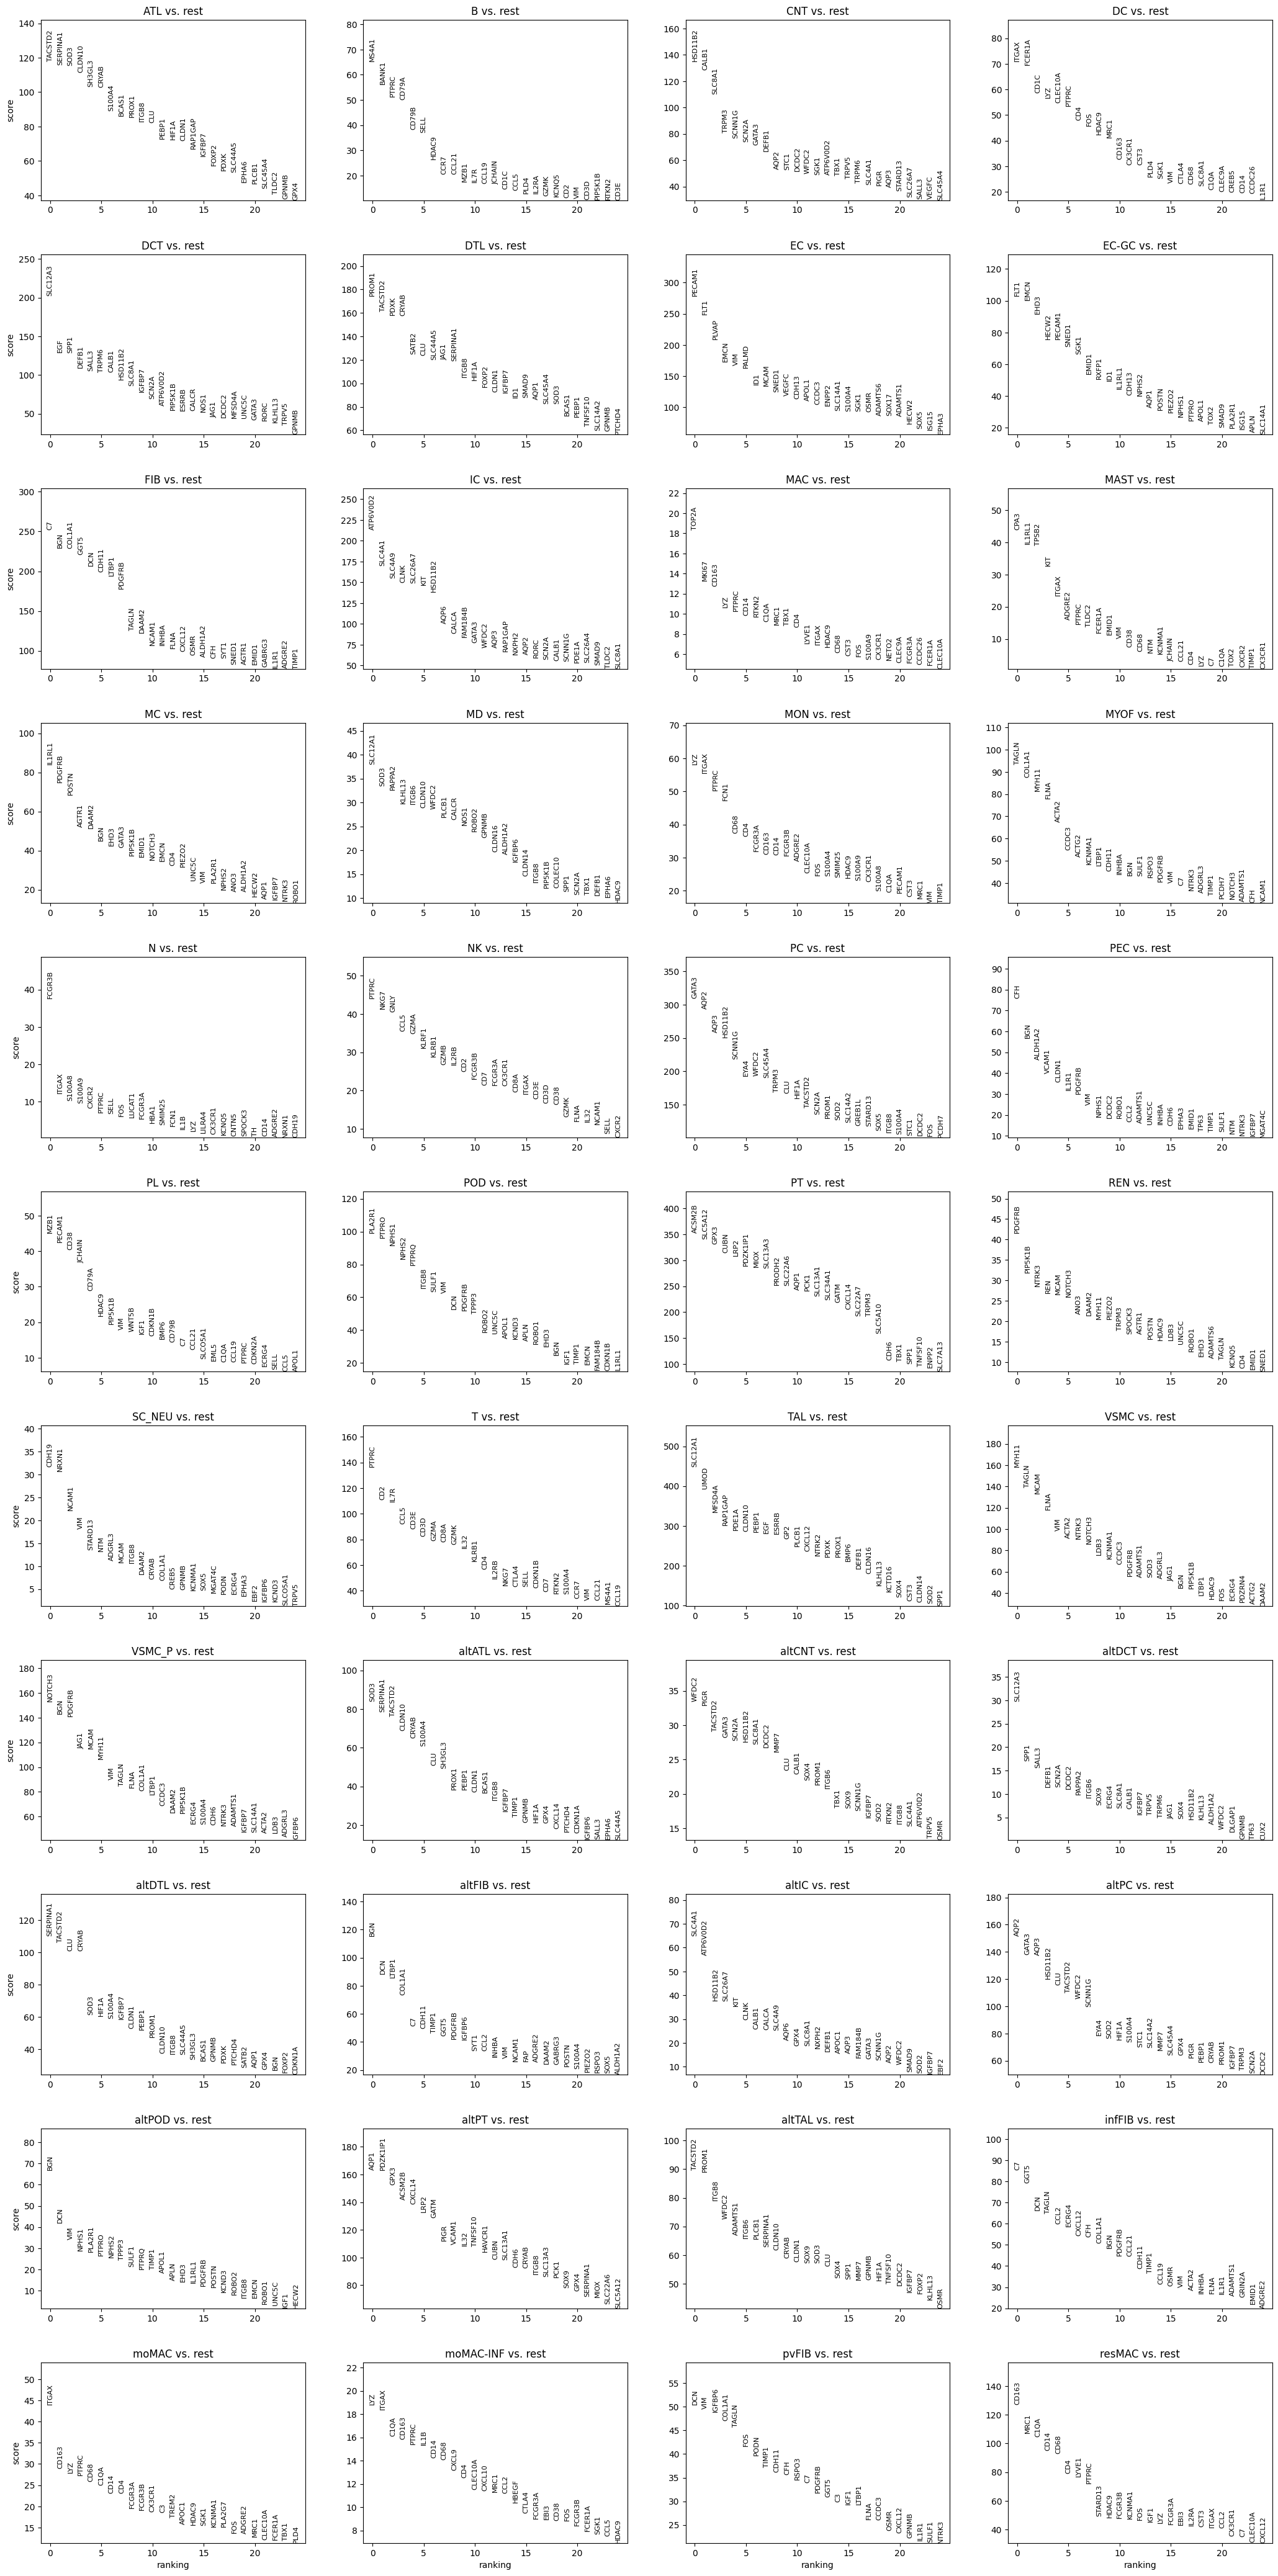

In [6]:
sc.tl.rank_genes_groups(adata, "v2.subclass.levelKIL", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [7]:
df = pd.DataFrame(adata.uns["rank_genes_groups"]["names"])
df_subset = df.iloc[:5]

# Convert to dictionary
mk_genes = df_subset.to_dict(orient='list')

# Print the result
mk_genes

{'ATL': ['TACSTD2', 'SERPINA1', 'SOD3', 'CLDN10', 'SH3GL3'],
 'B': ['MS4A1', 'BANK1', 'PTPRC', 'CD79A', 'CD79B'],
 'CNT': ['HSD11B2', 'CALB1', 'SLC8A1', 'TRPM3', 'SCNN1G'],
 'DC': ['ITGAX', 'FCER1A', 'CD1C', 'LYZ', 'CLEC10A'],
 'DCT': ['SLC12A3', 'EGF', 'SPP1', 'DEFB1', 'SALL3'],
 'DTL': ['PROM1', 'TACSTD2', 'PDXK', 'CRYAB', 'SATB2'],
 'EC': ['PECAM1', 'FLT1', 'PLVAP', 'EMCN', 'VIM'],
 'EC-GC': ['FLT1', 'EMCN', 'EHD3', 'HECW2', 'PECAM1'],
 'FIB': ['C7', 'BGN', 'COL1A1', 'GGT5', 'DCN'],
 'IC': ['ATP6V0D2', 'SLC4A1', 'SLC4A9', 'CLNK', 'SLC26A7'],
 'MAC': ['TOP2A', 'MKI67', 'CD163', 'LYZ', 'PTPRC'],
 'MAST': ['CPA3', 'IL1RL1', 'TPSB2', 'KIT', 'ITGAX'],
 'MC': ['IL1RL1', 'PDGFRB', 'POSTN', 'AGTR1', 'DAAM2'],
 'MD': ['SLC12A1', 'SOD3', 'PAPPA2', 'KLHL13', 'ITGB6'],
 'MON': ['LYZ', 'ITGAX', 'PTPRC', 'FCN1', 'CD68'],
 'MYOF': ['TAGLN', 'COL1A1', 'MYH11', 'FLNA', 'ACTA2'],
 'N': ['FCGR3B', 'ITGAX', 'S100A8', 'S100A9', 'CXCR2'],
 'NK': ['PTPRC', 'NKG7', 'GNLY', 'CCL5', 'GZMA'],
 'PC': ['GATA3',

In [ ]:
mk_genes_ordered_dict = OrderedDict([
    ('POD', ['NPHS1', 'PTPRO']),
    ('altPOD', ['TPPP3']),
    ('PEC', ['CFH','VCAM1']),
    ('PT', ['ACSM2B', 'LRP2']),
    ('altPT', ['SOX4','HAVCR1','PROM1']),
    ('DTL', ['AQP1','JAG1']),
    ('altDTL', ['TNFSF10', 'CLDN10']),
    ('ATL', ['COLEC10','PROX1']),
    ('altATL', ['CXCL14']),
    ('TAL', ['UMOD', 'EGF']),
    ('MD', ['NOS1','PAPPA2']),
    ('altTAL', ['ITGB6', 'BMP6',]),
    ('DCT', ['CALB1', 'SLC12A3']),
    ('altDCT', ['SCN2A']),
    ('CNT', ['SCN2A', 'SLC8A1']),
    ('altCNT', [ 'GATA3',]),
    ('PC', [ 'SLC14A2', 'AQP3', 'SCNN1G']),
    ('altPC', ['AQP2',]),
    ('IC', [ 'SLC4A1', 'SLC26A7']),
    ('altIC', [ 'ATP6V0D2', 'HSD11B2']),
    ('EC', ['PECAM1', 'PLVAP', 'EHD3']),
    ('EC-GC', ['FLT1', 'EMCN']),
    ('FIB', ['ECRG4', 'EMID1', 'DCN']),
    ('altFIB', ['TIMP1', 'IGFBP6', 'PODN']),
    ('pvFIB', ['CNTN5', 'PLD5', 'RSPO3']),
    ('MYOF', ['FAP', 'INHBA','SULF1',]),
    ('infFIB', ['IL1R1', 'OSMR']),
    ('MC', ['PIEZO2', 'ROBO1']),
    ('REN', [ 'SPOCK3', 'REN']),
    ('VSMC', ['LDB3', 'TAGLN']),
    ('VSMC_P', ['NOTCH3']),
    ('B', ['MS4A1', 'BANK1']),
    ('PL', ['MZB1', 'CD38', 'JCHAIN']),
    ('T', ['CD4', 'CD2', 'IL7R']),
    ('NK', ['NKG7', 'GNLY',]),
    ('MAST', ['CPA3', 'TPSB2']),
    ('MAC', ['CD163', 'LYZ']),
    ('resMAC', ['CD163', 'MRC1', 'LYVE1']),
    ('moMAC-INF', ['CXCL9','IL1B', 'LUCAT1']),
    ('moMAC', ['APOC1', 'GPNMB', 'PLA2G7']),
    ('DC', ['CCL19', 'CCR7','CLEC10A']),
    ('MON', ['CD14', 'FCN1']),
    ('N', ['FCGR3B','S100A8']),
    ('SC_NEU', ['NRXN1'])
])


/usr/local/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/usr/local/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()


/usr/local/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


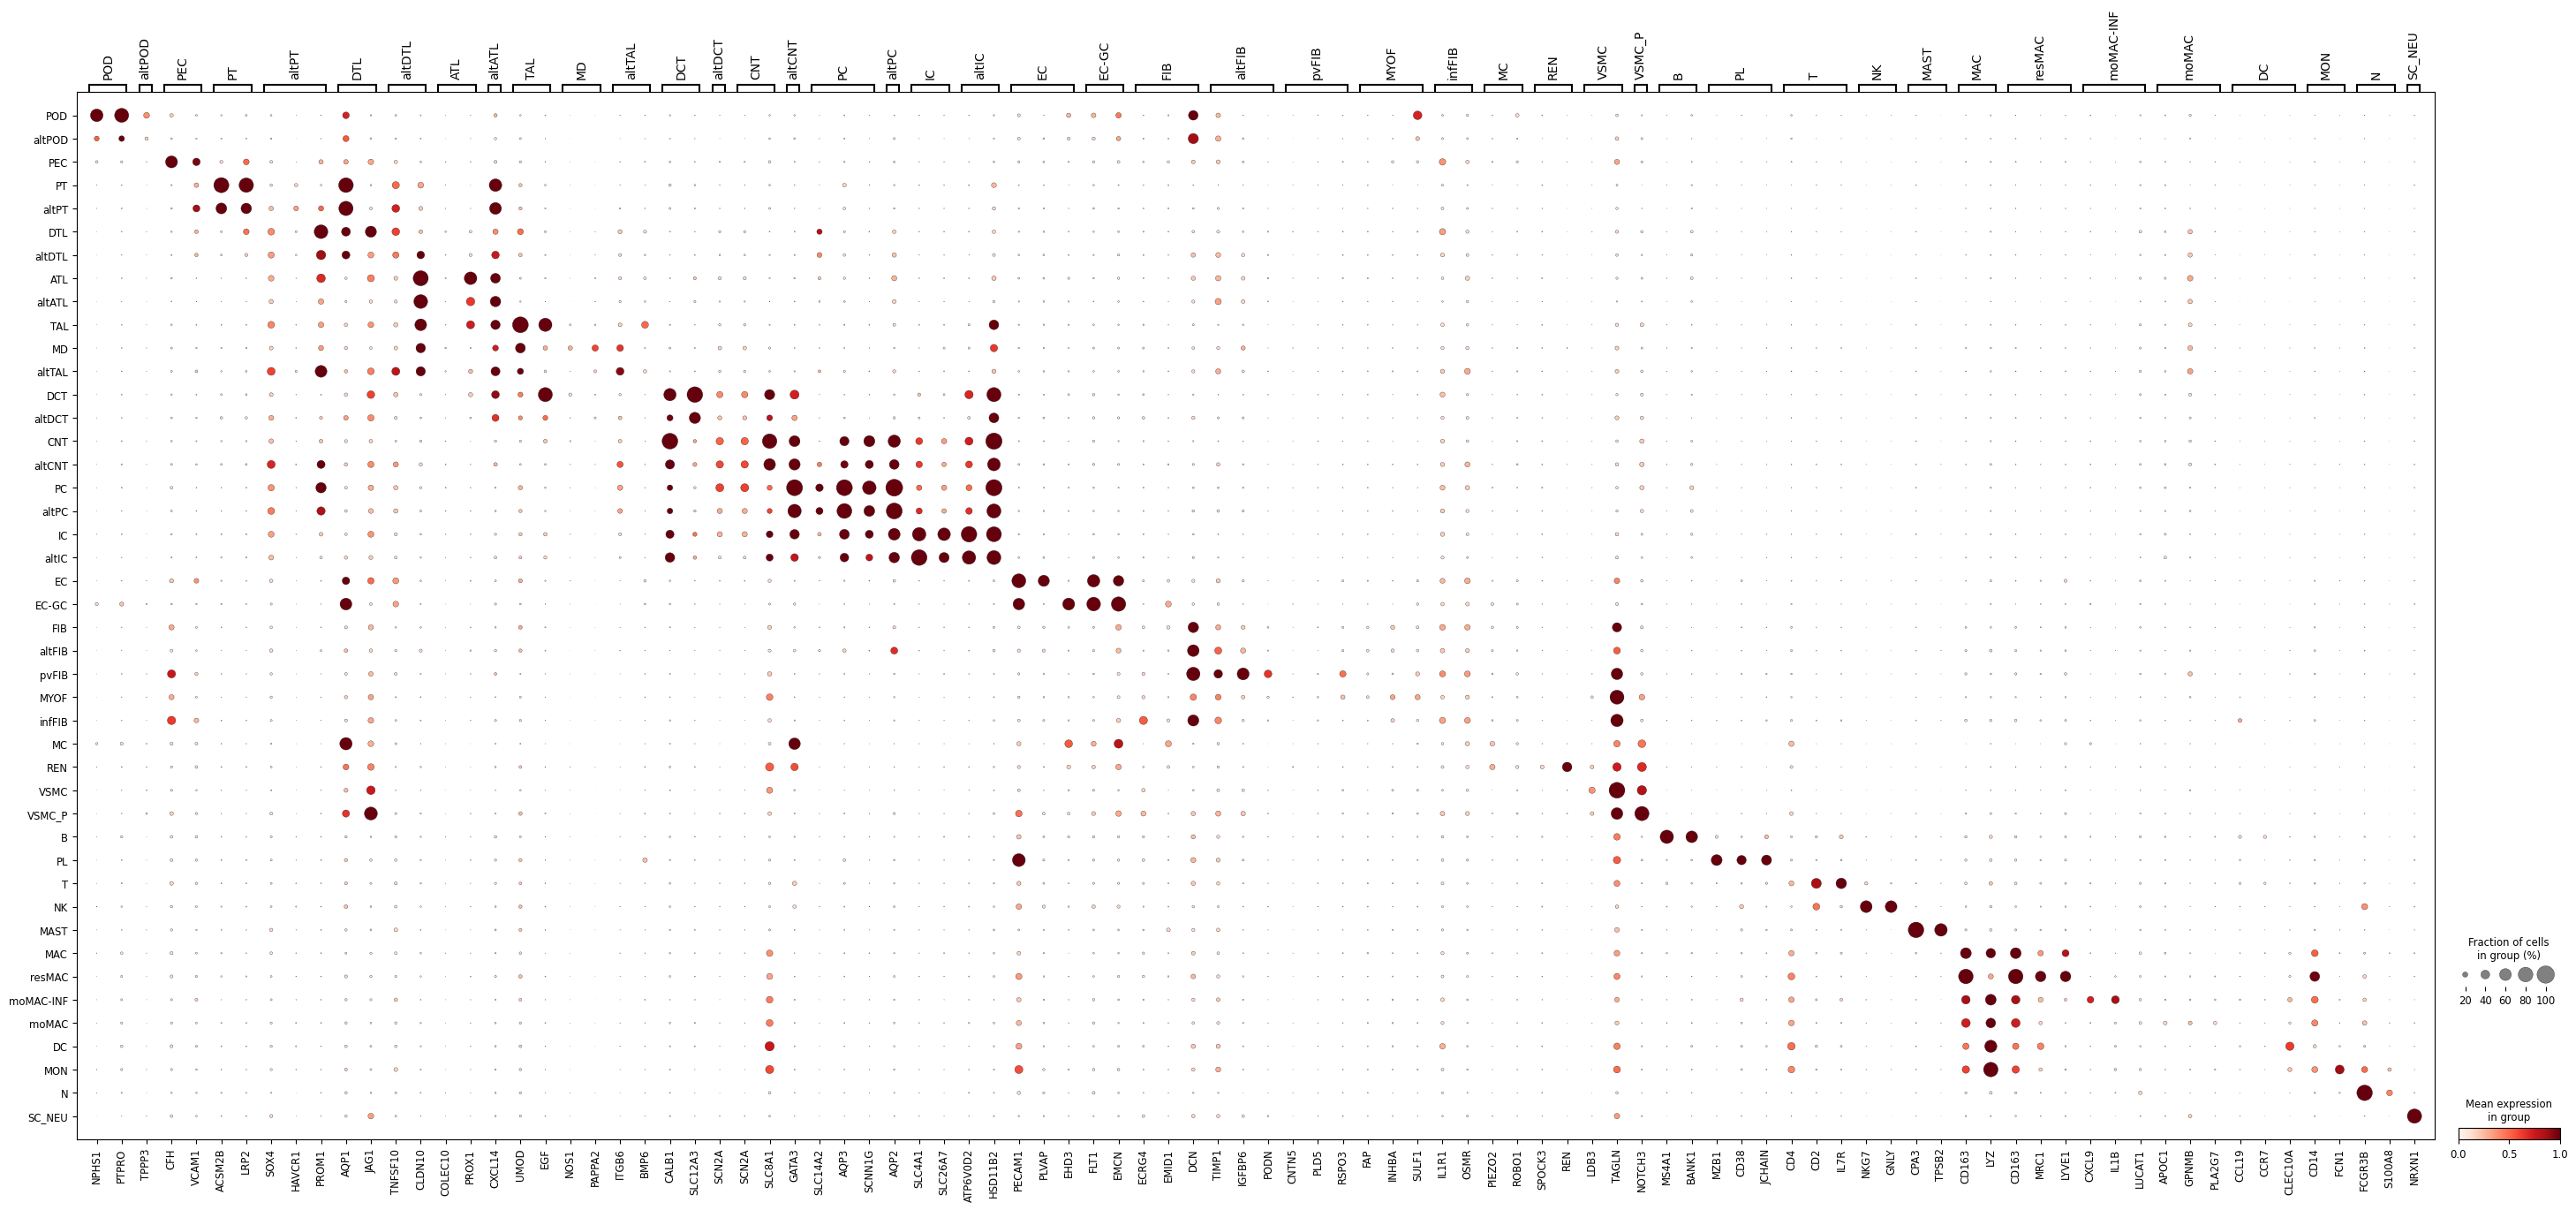

In [10]:
desired_order = [
    "POD", "altPOD","PEC", "PT", "altPT", "DTL", 
    "altDTL", "ATL", "altATL", "TAL","MD", "altTAL", "DCT", "altDCT", "CNT", 
    "altCNT", "PC", "altPC", "IC", "altIC", 
    "EC", "EC-GC", "FIB", "altFIB", 
    "pvFIB", "MYOF", "infFIB", "MC", "REN", "VSMC", "VSMC_P", "B", "PL", "T", "NK", 
    "MAST", "MAC", "resMAC", "moMAC-INF", "moMAC", "DC", "MON", "N", 
    "SC_NEU"
]

sc.pl.dotplot(
    adata,
    mk_genes_ordered_dict,
    groupby="v2.subclass.levelKIL",
    categories_order=desired_order, vmax = 1, 
    save = "Atlas_seven_samples_dotplot.png"
)


## Correlation with Atlas 

In [11]:
adataref = sc.read_h5ad("/storage2/fs1/sanjayjain/Active/Stephanie/objects/atlasv2_ds_50prop.h5ad")
cell_types_to_remove = ['Ad', 'PapE','ERY']
# Filter out these cell types
adataref = adataref[~adataref.obs['v2.subclass.l2'].isin(cell_types_to_remove)].copy() 
adataref

AnnData object with n_obs × n_vars = 691227 × 36588
    obs: 'library', 'nCount_RNA', 'nFeature_RNA', 'percent.er', 'percent.mt', 'v1_barcode', 'source', 'assay', 'experiment_long', 'experiment', 'patient', 'specimen', 'condition_level3', 'condition_level2', 'condition_level1', 'condition', 'percent_cortex', 'percent_medulla', 'region_level3', 'region_level2', 'region_level1', 'age_binned', 'sex', 'race', 'KDIGO_stage', 'baseline_eGFR_binned', 'proteinuria_binned', 'A1c_binned', 'albuminuria_binned', 'diabetes_history', 'diabetes_duration', 'hypertension_history', 'hypertension_duration', 'on_RAAS_blockade', 'ckd_stageC', 'adj_cm_ati.ain', 'location', 'laterality', 'protocol', 'tissue_type_full', 'tissue_type', 'atlas_version', 'v1clusters', 'v1.subclass.l3', 'v1.subclass.l2', 'v1.subclass.l1', 'v1.state.l1', 'v1.state.l2', 'v1.class', 'v1.structure', 'group', 'v2.clusters', 'v2.subclass.full', 'v2.subclass.l3', 'v2.subclass.l2', 'v2.subclass.sp', 'v2.subclass.l1', 'v2.state.l2', 'v2.s

In [12]:
levelKIL_map = {
    "POD": 'POD', "dPOD": 'altPOD', "PEC": 'PEC',
    "PT-S1": 'PT', "PT-S2": 'PT', "PT-S3": 'PT',
    "dPT": 'altPT', "aPT": 'altPT', "frPT": 'altPT', "cycPT": 'altPT',
    "DTL1": 'DTL', "DTL2": 'DTL', "DTL3": 'DTL', "aDTL": 'altDTL', "dDTL": 'altDTL',
    "ATL": 'ATL', "dATL": 'altATL',
    "M-TAL": 'TAL', "dM-TAL": 'TAL', "C/M-TAL": 'TAL', "C-TAL": 'TAL', "MD": 'MD', "dC-TAL": 'TAL',
    "frTAL": 'altTAL', "aTAL": 'altTAL', "cycTAL": 'altTAL',
    "DCT": 'DCT', "dDCT": 'altDCT', "aDCT": 'altDCT',
    "CNT": 'CNT', "dCNT": 'altCNT', "aCNT": 'altCNT',
    "C-PC": 'PC', "M-PC": 'PC', "dM-PC": 'altPC', "IMCD": 'PC', "dIMCD": 'altPC',
    "C-IC-A": 'IC', "dC-IC-A": 'altIC', "M-IC-A": 'IC', "dM-IC-A": 'IC', "tPC-IC": 'IC', "IC-B": 'IC',
    "EC-GC": 'EC-GC', "dEC-GC": 'EC-GC', "aEC-GC": 'EC-GC',
    "EC-AA": 'EC', "EC-DVR": 'EC', "EC-PTC": 'EC', "EC-AVR": 'EC', "dEC-AVR": 'EC',
    "infEC-AVR": 'EC', "EC-V": 'EC', "EC-PCV": 'EC', "angEC-PTC": 'EC', "EC-EA": 'EC',
    "dEC-PTC": 'EC', "infEC-PTC": 'EC', "EC-LYM": 'EC', "cycEC": 'EC',
    "M-FIB": 'FIB', "dM-FIB": 'altFIB', "FIB": 'FIB', "MYOF": 'MYOF',
    "infFIB": 'infFIB', "dFIB": 'FIB', "pvFIB": 'pvFIB',
    "MC": 'MC', "REN": 'REN', "VSMC": 'VSMC', "VSMC/P": 'VSMC_P', "dVSMC": 'VSMC', "B": 'B', "PL": 'PL', "T": 'T', "NK": 'NK',
    "MAST": 'MAST', "resMAC": 'resMAC', "moMAC-INF": 'moMAC-INF', "moMAC": 'moMAC',
    "DC": 'DC', "MON": 'MON', "N": 'N', "cycT": 'T', "cycMAC": 'MAC', "SC/NEU": 'SC_NEU'
} 
if 'v2.subclass.l2' in adataref.obs.columns:
    adataref.obs['v2.subclass.levelKIL'] = adataref.obs['v2.subclass.l2'].map(levelKIL_map).astype(str)
adataref

AnnData object with n_obs × n_vars = 691227 × 36588
    obs: 'library', 'nCount_RNA', 'nFeature_RNA', 'percent.er', 'percent.mt', 'v1_barcode', 'source', 'assay', 'experiment_long', 'experiment', 'patient', 'specimen', 'condition_level3', 'condition_level2', 'condition_level1', 'condition', 'percent_cortex', 'percent_medulla', 'region_level3', 'region_level2', 'region_level1', 'age_binned', 'sex', 'race', 'KDIGO_stage', 'baseline_eGFR_binned', 'proteinuria_binned', 'A1c_binned', 'albuminuria_binned', 'diabetes_history', 'diabetes_duration', 'hypertension_history', 'hypertension_duration', 'on_RAAS_blockade', 'ckd_stageC', 'adj_cm_ati.ain', 'location', 'laterality', 'protocol', 'tissue_type_full', 'tissue_type', 'atlas_version', 'v1clusters', 'v1.subclass.l3', 'v1.subclass.l2', 'v1.subclass.l1', 'v1.state.l1', 'v1.state.l2', 'v1.class', 'v1.structure', 'group', 'v2.clusters', 'v2.subclass.full', 'v2.subclass.l3', 'v2.subclass.l2', 'v2.subclass.sp', 'v2.subclass.l1', 'v2.state.l2', 'v2.s

In [13]:
query = adata

In [14]:
ref = adataref
common_genes = ref.var_names.intersection(query.var_names)

# Subset to these genes
ref = ref[:, common_genes]
query = query[:, common_genes]

In [15]:
ref_avg = ref.to_df().groupby(ref.obs["v2.subclass.levelKIL"]).mean()
query_avg = query.to_df().groupby(query.obs["v2.subclass.levelKIL"]).mean()

/tmp/755259.tmpdir/ipykernel_790/2566234278.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  query_avg = query.to_df().groupby(query.obs["v2.subclass.levelKIL"]).mean()


In [16]:
correlation_matrix = pd.DataFrame(index=ref_avg.index, columns=query_avg.index)

# Loop through each cell type in ref_avg
for ref_cell in ref_avg.index:
    # Get the gene expression vector for the current cell type in reference
    ref_vector = ref_avg.loc[ref_cell]
    
    # Compute correlation with all cell types in query_avg
    for query_cell in query_avg.index:
        query_vector = query_avg.loc[query_cell]
        
        # Calculate the correlation and store it
        correlation_matrix.loc[ref_cell, query_cell] = ref_vector.corr(query_vector)

# Convert the correlation_matrix to float type for numerical operations
correlation_matrix = correlation_matrix.astype(float)

# Display the final correlation matrix
correlation_matrix

v2.subclass.levelKIL,ATL,B,CNT,DC,DCT,DTL,EC,EC-GC,FIB,IC,...,altIC,altPC,altPOD,altPT,altTAL,infFIB,moMAC,moMAC-INF,pvFIB,resMAC
v2.subclass.levelKIL,,,,,,,,,,,,,,,,,,,,,
ATL,0.553991,0.031356,0.120159,0.056202,0.154042,0.492514,0.128732,0.035671,0.148248,0.172932,...,0.215786,0.283675,0.140264,0.134331,0.561336,0.109194,0.076611,0.068699,0.101012,0.077382
B,0.168579,0.659296,0.098211,0.195626,0.193757,0.220879,0.161616,0.082964,0.157976,0.094465,...,0.149673,0.109151,0.177231,0.245358,0.303741,0.167942,0.179885,0.166051,0.165518,0.156504
CNT,0.140242,0.019511,0.626710,0.100222,0.441091,0.189046,0.079703,0.030857,0.132058,0.331176,...,0.439367,0.286878,0.104942,0.161349,0.259482,0.106329,0.094570,0.067899,0.075331,0.092187
DC,0.169045,0.229362,0.265501,0.496083,0.281812,0.221935,0.204072,0.095153,0.174635,0.131153,...,0.209644,0.122522,0.189142,0.217590,0.310745,0.178239,0.400217,0.400312,0.186350,0.325873
DCT,0.138994,0.019380,0.321457,0.051600,0.780852,0.191169,0.071624,0.018343,0.120380,0.226925,...,0.296457,0.137250,0.102905,0.168874,0.276167,0.105783,0.066975,0.032729,0.062784,0.067613
DTL,0.367236,0.025327,0.114297,0.041399,0.173563,0.517934,0.137050,0.057373,0.161454,0.149205,...,0.198184,0.230923,0.145321,0.177368,0.544299,0.122651,0.057617,0.045579,0.094606,0.067556
EC,0.189343,0.116756,0.133924,0.160356,0.170152,0.278051,0.622328,0.592640,0.252223,0.113756,...,0.180668,0.156273,0.246620,0.201116,0.322720,0.214606,0.157207,0.148062,0.202957,0.166002
EC-GC,0.072111,0.033793,0.076702,0.054756,0.126746,0.140509,0.407654,0.742424,0.121395,0.032356,...,0.082395,0.042643,0.152701,0.209305,0.158347,0.088709,0.067668,0.042979,0.082562,0.075269
FIB,0.181909,0.149034,0.134097,0.207724,0.145646,0.246412,0.254041,0.179609,0.639540,0.111126,...,0.179162,0.153746,0.301693,0.146217,0.304215,0.556761,0.152954,0.163592,0.429661,0.256232


In [17]:
desired_order = [
    "POD", "altPOD","PEC", "PT", "altPT", "DTL", 
    "altDTL", "ATL", "altATL", "TAL","MD", "altTAL", "DCT", "altDCT", "CNT", 
    "altCNT", "PC", "altPC", "IC", "altIC", 
    "EC", "EC-GC", "FIB", "altFIB", 
    "pvFIB", "MYOF", "infFIB", "MC", "REN", "VSMC", "VSMC_P", "B", "PL", "T", "NK", 
    "MAST", "MAC", "resMAC", "moMAC-INF", "moMAC", "DC", "MON", "N", 
    "SC_NEU"
]
reordered_matrix = correlation_matrix.reindex(index=desired_order, columns=desired_order)
reordered_matrix2 = reordered_matrix.T

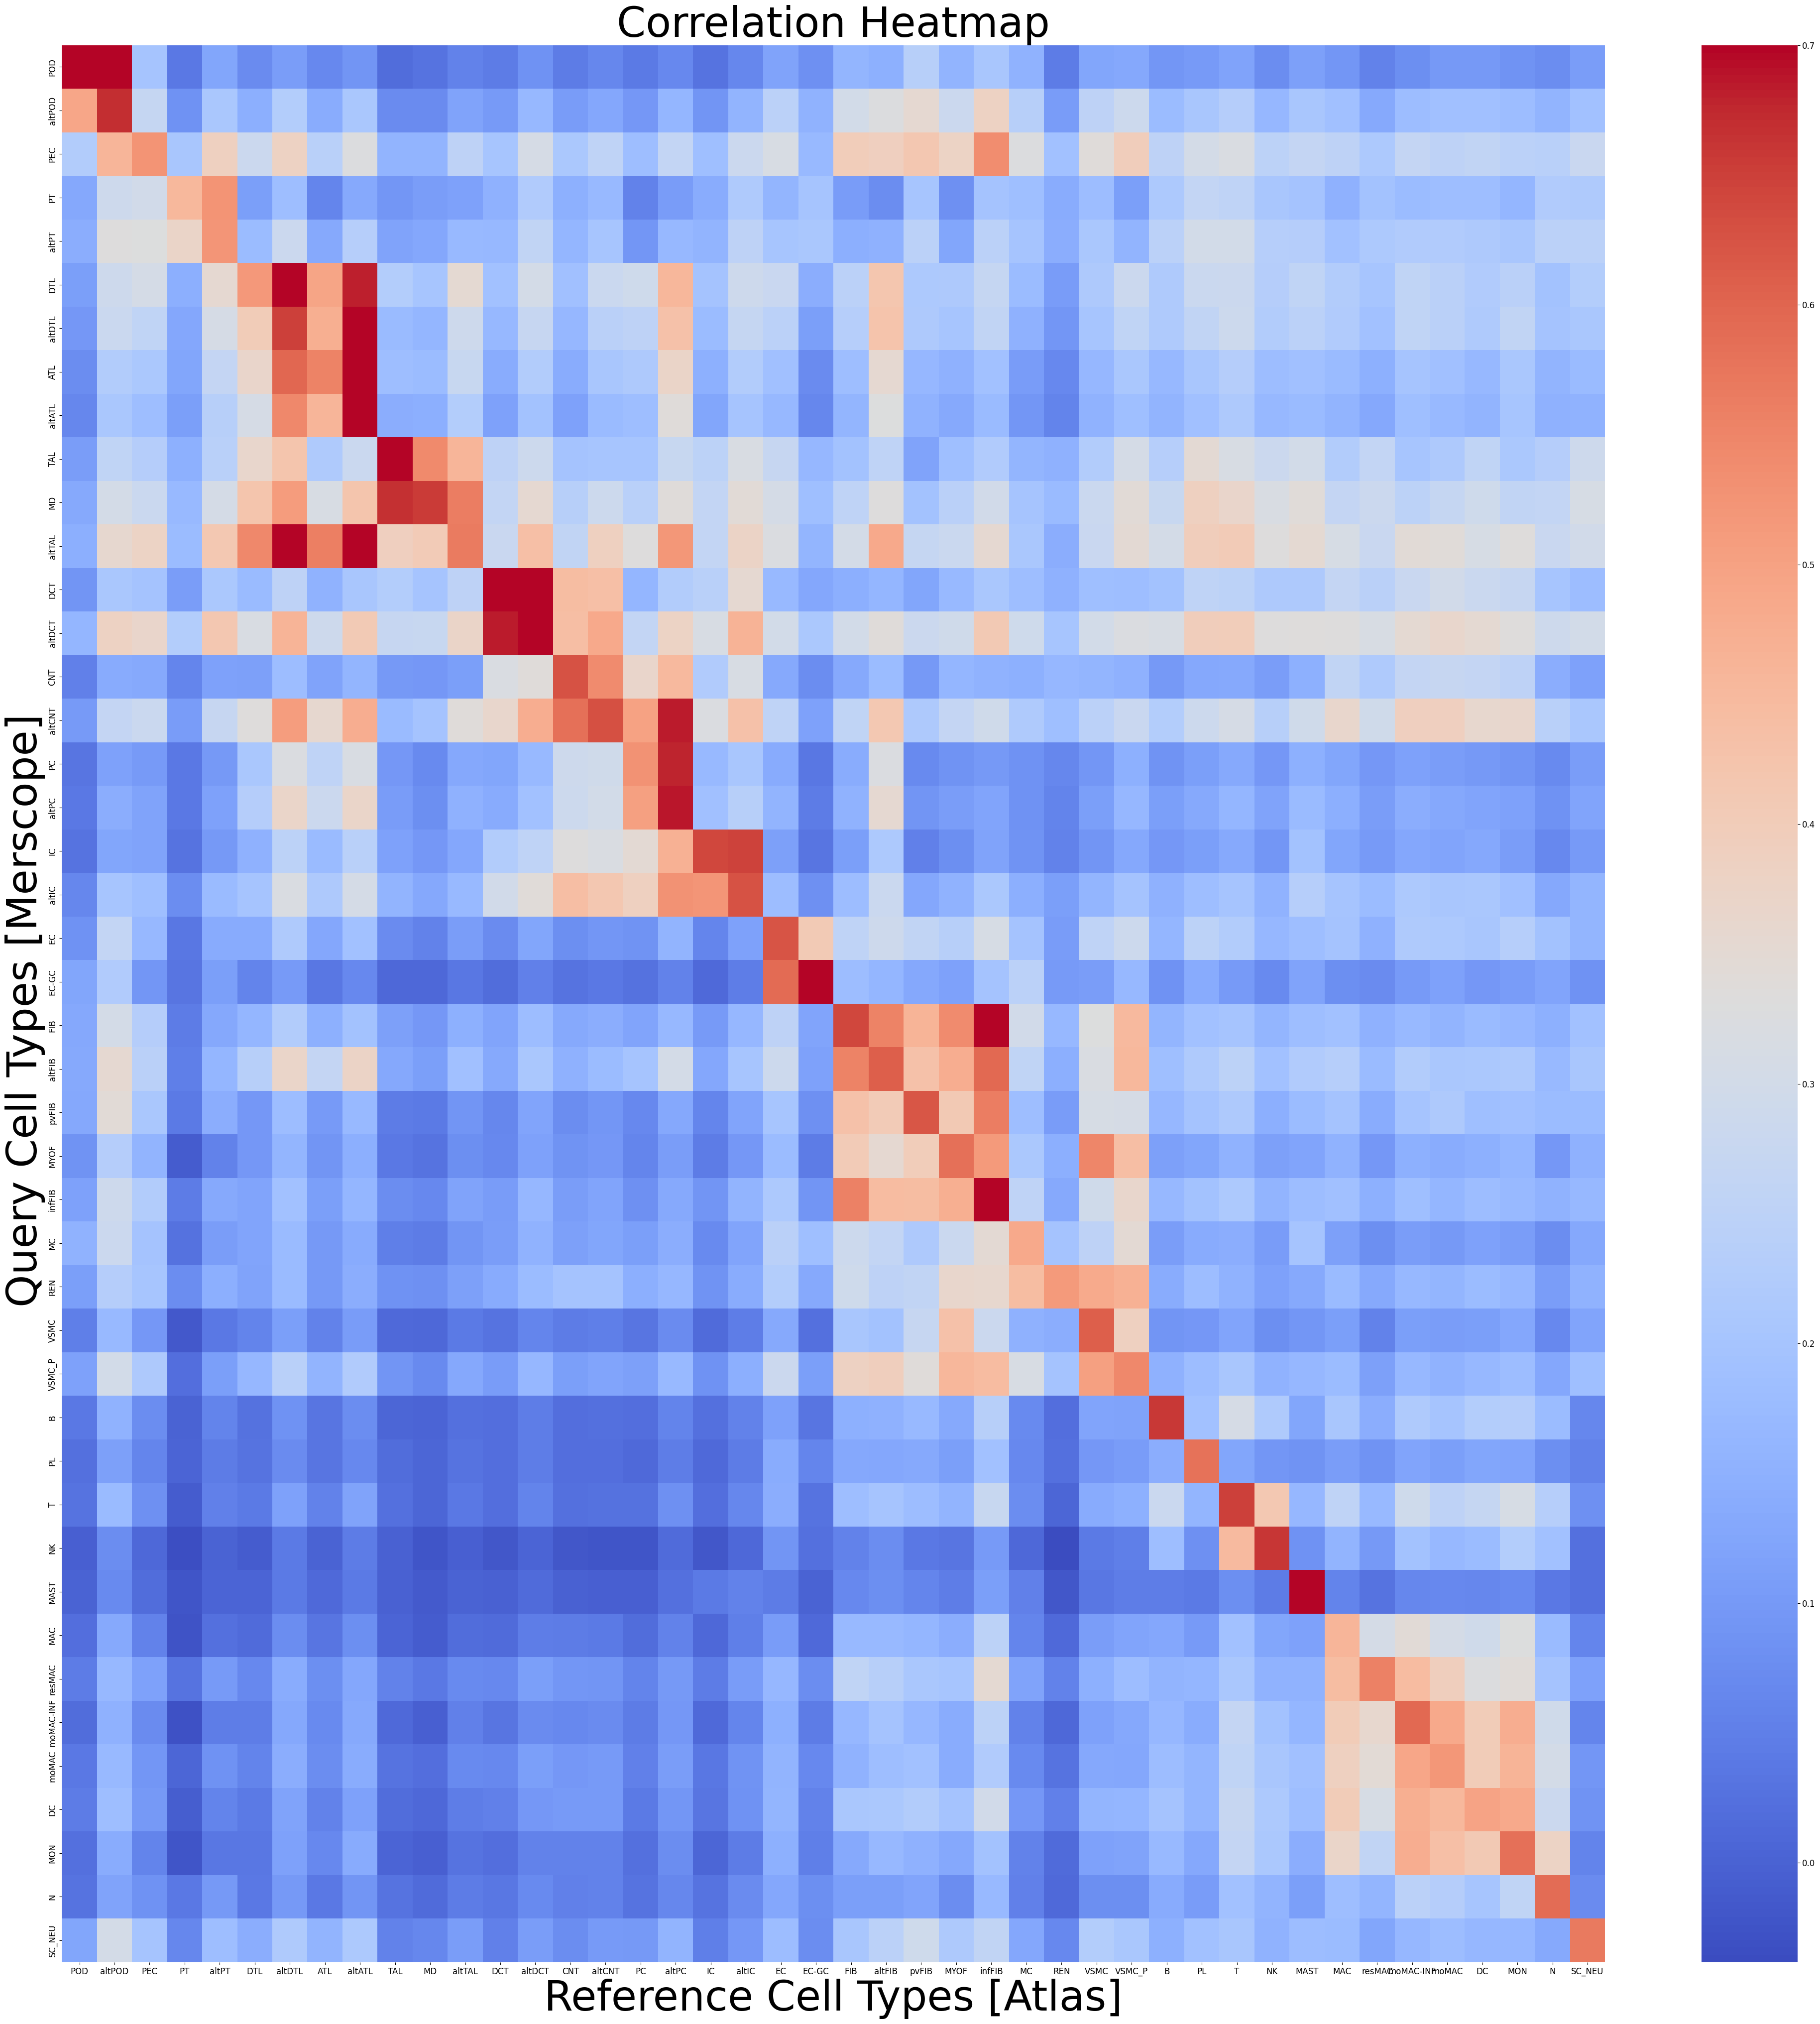

In [18]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt 
plt.figure(figsize=(50, 50))
sns.heatmap(reordered_matrix2, cmap="coolwarm", annot=False, cbar=True , vmax = 0.7)
plt.xticks(fontsize=12)  # Adjust the font size as needed
plt.yticks(fontsize=12)
cbar = plt.gca().collections[0].colorbar  # Access the color bar
cbar.ax.tick_params(labelsize=12)  # Adjust font size for color bar labels 

# Add titles and labels
plt.title("Correlation Heatmap", fontsize=60)
plt.xlabel("Reference Cell Types [Atlas]", fontsize=60)
plt.ylabel("Query Cell Types [Merscope] ", fontsize=60)
plt.savefig("correlation_heatmapatlasxenium.png")
# Show the plot
plt.show()